# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/2). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

### * plot your dataset

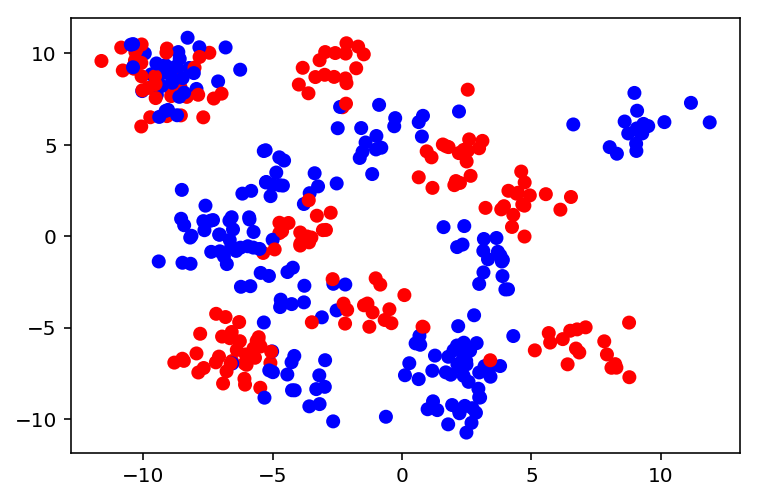

In [5]:
plt.figure()
plt.scatter(X[:,0], X[:, 1], color=y)

### * split your dataset into a training and testing set. Comment on how you decided to split your data.
### * evaluate the performance of the classifier on your training dataset.
### * evaluate the performance of the classifier on your testing dataset.
### * repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment

In [228]:
from sklearn.metrics import accuracy_score, auc

def create_dataset(random_state=42):
    
    labels = ["b", "r"]
    X, y = make_blobs(n_samples=400, centers=23, random_state=random_state)
    y = np.take(labels, (y < 10))
    
    return X, y


def create_and_train(X, y, **kwargs):
    
    kneigh = KNeighborsClassifier(**kwargs)
    kneigh.fit(X_train, y_train)
    
    return kneigh

def evaluate_accuracy(classifier, X, y):
    
    y_predict = classifier.predict(X)
    accuracy = accuracy_score(y, y_predict, normalize=True, sample_weight=None)
    
    return accuracy

In [229]:
from sklearn.model_selection import train_test_split

n_trials = 500
test_sizes = np.linspace(10, 90, num=100) / 100
scores = np.zeros((2,) + test_sizes.shape + (n_trials, ))

for j in range(n_trials):

    X, y = create_dataset(random_state=j)

    for i, test_size in enumerate(test_sizes):
    
    
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=test_size, 
                                                            train_size=1-test_size, 
                                                            shuffle=True)
        
        classifier = create_and_train(X_train, y_train)
        
        scores[0, i, j] = evaluate_accuracy(classifier, X_test, y_test)
        scores[1, i, j] = evaluate_accuracy(classifier, X_train, y_train)


    


    

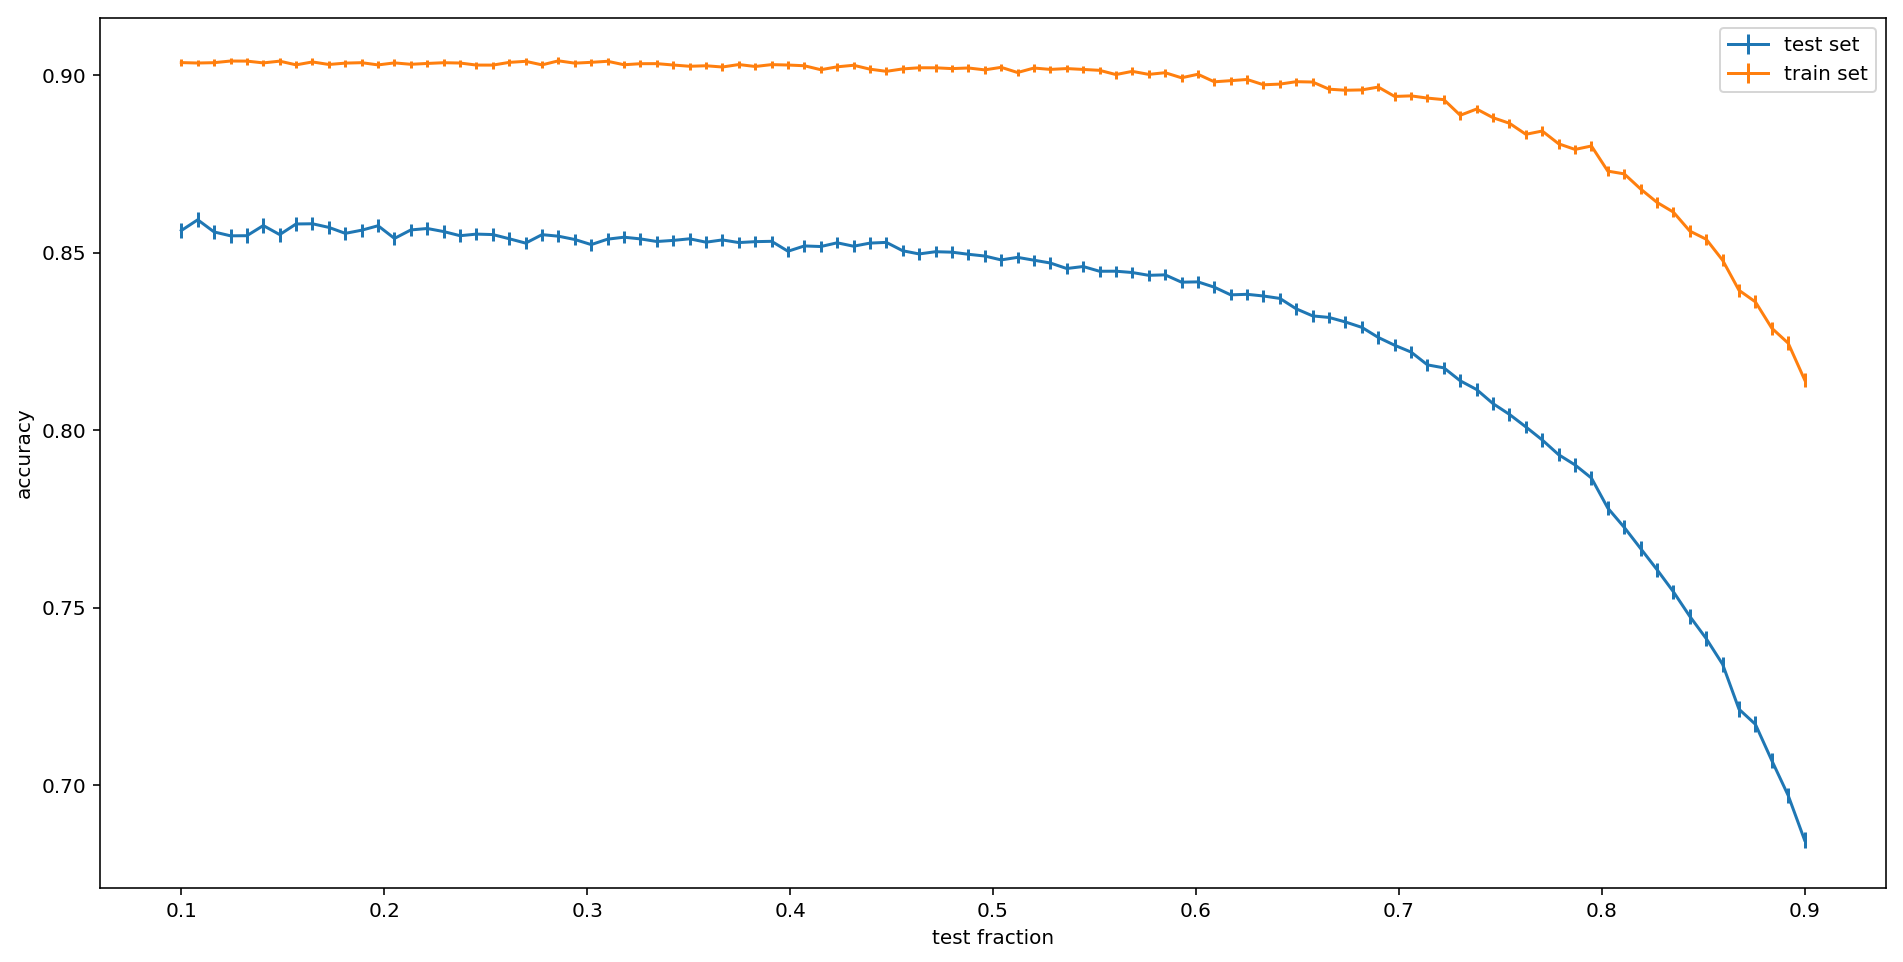

In [230]:
val = scores.mean(axis=-1)
err = scores.std(axis=-1) / np.sqrt(scores.shape[-1])

fig = plt.figure(figsize=(16, 8))
axes = fig.add_subplot(111)
axes.errorbar(test_sizes, val[0], yerr=err[0], label='test set')
axes.errorbar(test_sizes, val[1], yerr=err[1], label='train set')
axes.set_xlabel('test fraction')
axes.set_ylabel('accuracy')
axes.legend(loc='best')

It seems that the best splitting is : ~0.3 testing and ~0.7 training. For now we use these fractions.

### * comment on why the two performance estimates agree or disagree.

### * plot the accuracy of the classifier as a function of `n_neighbors`.

In [231]:
n_trials = 500
test_size = 0.3
number_of_neighbors = np.arange(1, 41, 2) # Since KNN works on a voting system, it is better to use odd numbers of neighbors
scores = np.zeros((2,) + number_of_neighbors.shape + (n_trials, ))

for j in range(n_trials):
    
    X, y = create_dataset(random_state=j)

    for i, n_neighbors in enumerate(number_of_neighbors):
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=test_size, 
                                                            train_size=1-test_size, 
                                                            shuffle=True)

        
        classifier = create_and_train(X_train, y_train, n_neighbors=n_neighbors)
        
        scores[0, i, j] = evaluate_accuracy(classifier, X_test, y_test)
        scores[1, i, j] = evaluate_accuracy(classifier, X_train, y_train)


    



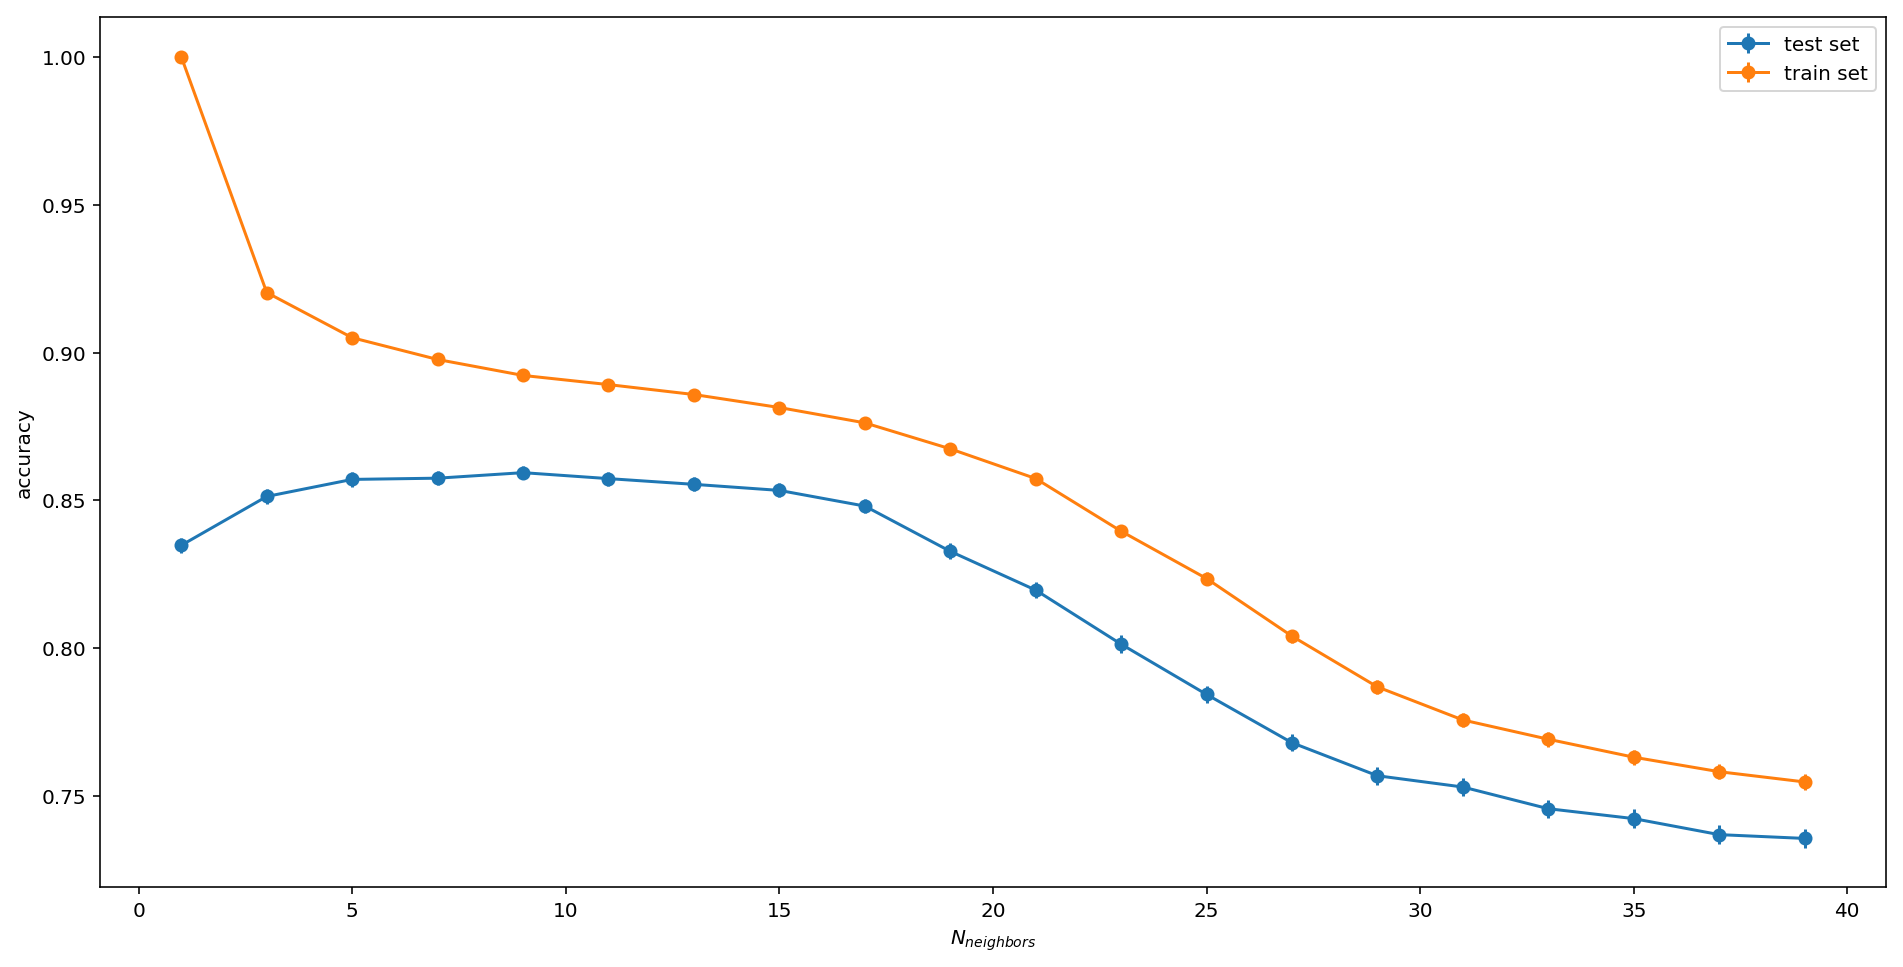

In [232]:
val = scores.mean(axis=-1)
err = scores.std(axis=-1) / np.sqrt(scores.shape[-1])

plt.figure(figsize=(16, 8))
plt.errorbar(number_of_neighbors, val[0], yerr=err[0], label='test set', linestyle='-', marker='o')
plt.errorbar(number_of_neighbors, val[1], yerr=err[1], label='train set', linestyle='-', marker='o')
plt.xlabel('$N_{neighbors}$')
plt.ylabel('accuracy')
plt.legend(loc='best')

### * comment on the similarities and differences between the performance on the testing and training dataset.

The training set has an accuracy of 1 for n_neighbor = 1 which is expected because the algorithm learns entirely the training set. The "sweet" spot seems to be at n_neighbors = 11. In that case the accuracy of the testing set is maximum. The training accuracy is always better than the testing accuracy which is expected since KNeighbors is learning from the training set. When reaching to low complexity (`n_neighbors`> 17) the accuracy drops. This is simply because `n_neighbors` is greater than the average number of samples per blob : 
$$N_{neighbors} > \rho_{blob} = \frac{N_{samples}}{N_{blobs}} = \frac{400}{23} \sim  17.4 ~{\rm samples \cdot blob^{-1}}$$ 

### * is a KNeighbor Classifier with 4 or 10 neighbors more complicated?

As the number of neighboors increases, the complexity decreases. Therefore the classifier with $N_{neighbors}=4$ is more complicated than with $N_{neighbors}=10$

### * find the best setting of `n_neighbors` for this dataset.

To find the best setting of `n_neighbors`, one can use a stratified k-fold search over this parameter :

In [240]:
from sklearn.model_selection import GridSearchCV

X, y = create_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

# set of parameters we want to try
param_grid = {'n_neighbors':  np.arange(1, 31, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=100)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
# print("train-set score: {:.3f}".format(grid.score(X_train, y_train)))

best mean cross-validation score: 0.861
best parameters: {'n_neighbors': 13}
test-set score: 0.875


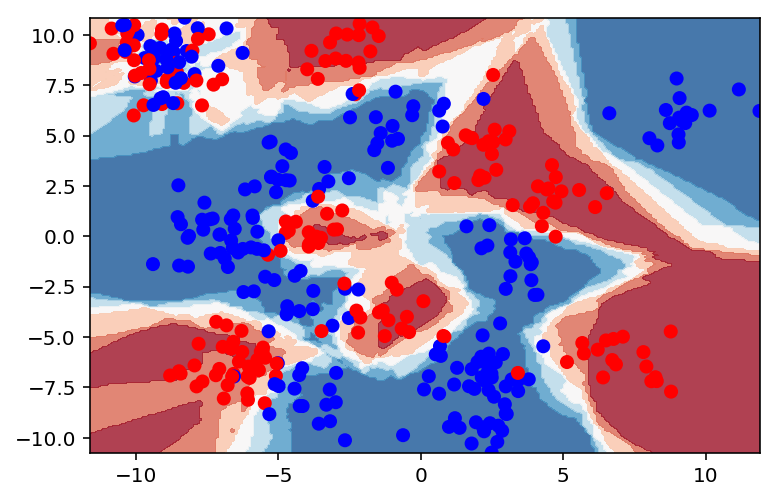

In [234]:
from utils import plot_surface

plot_surface(grid.best_estimator_, X, y)

The best setting is found at $N_{neighbors} = 13$. This is in accordance with the figure shown above (accuracy vs $N_{neighbors}$). However we can see that the accuracy of the testing set is plateaud between 5 and 15 neighbors. Therefore it is hard to conclude if the stratified k-fold search really gave us the best seting for `n_neighbors`. One can conclude that any value of `n_neighbors` from 5 to 15 is a good choice for this dataset.

### * why is this the best setting?

See above


---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [235]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(X.shape[0], 1), y

### * plot your dataset

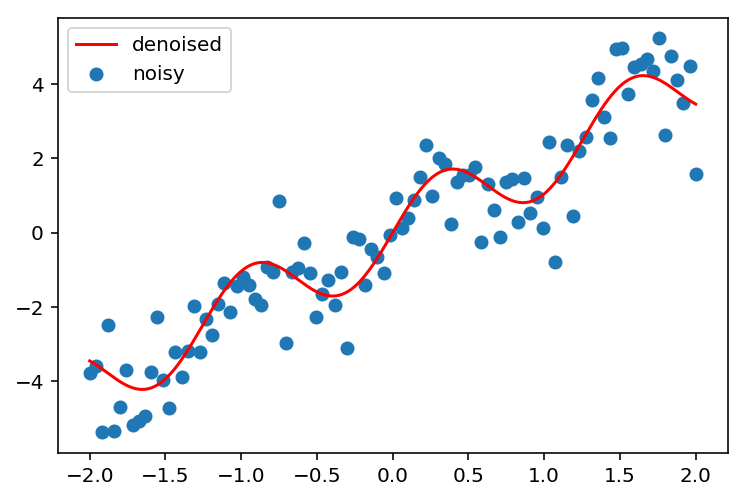

In [126]:
X, y = make_regression()
X_true, y_true = make_regression(n_samples=1000, noise_level=0)
plt.figure()
plt.scatter(X, y, label='noisy')
plt.plot(X_true, y_true, label='denoised', color='r')
plt.legend()

### * fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 

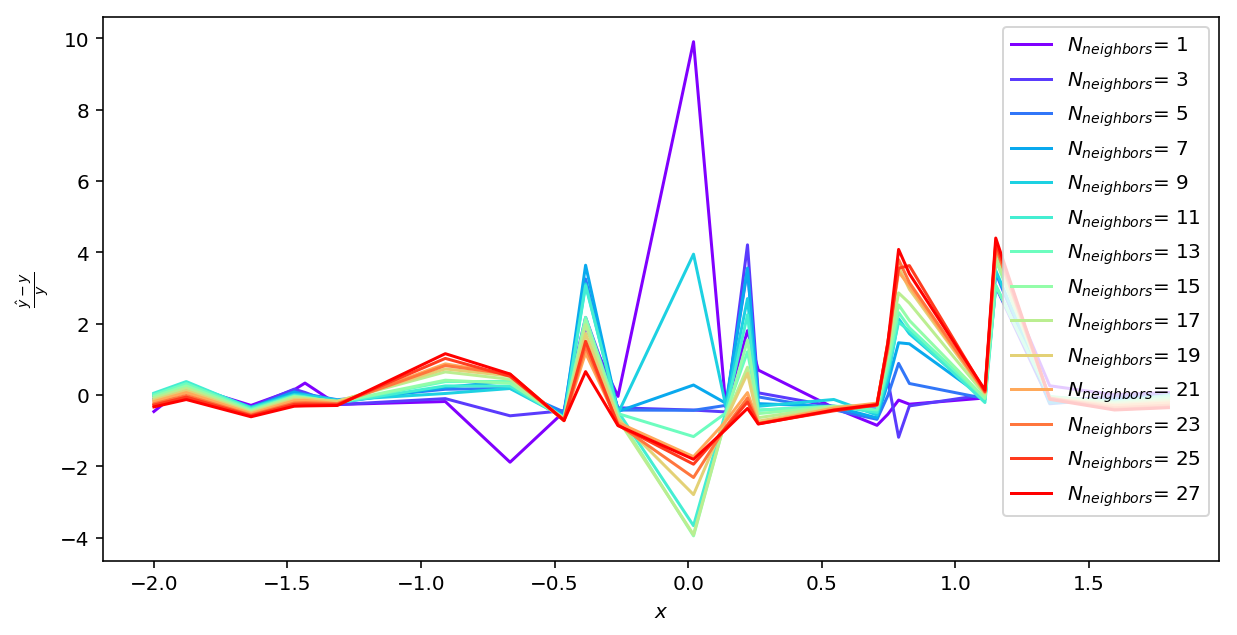

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.pyplot import cm
from matplotlib.colors import Normalize

n_neighbors = np.arange(1, 29, 2, dtype=np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y)

sorted_indices = np.argsort(X_test, axis=0)[:, 0]
X_test = X_test[sorted_indices]
y_test = y_test[sorted_indices]

plt.figure(figsize=(10, 5))

cmap = cm.rainbow
norm = Normalize(vmin=np.min(n_neighbors), vmax=np.max(n_neighbors))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for k in n_neighbors:

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    
    plt.plot(X_test, (y_predict - y_test)/y_test, label='$N_{neighbors}$' + '= {}'.format(k), color=cmap(norm(k)))
    
plt.legend(loc='best')
plt.ylabel(r'$\frac{\hat{y} - y}{y}$')    
plt.xlabel('$x$')
    
    

### * plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.

In [137]:
from sklearn.metrics import mean_squared_error

n_trials = 100
error = np.zeros((2, len(n_neighbors), n_trials))

for index_k, k in enumerate(n_neighbors):
    
    for i in range(n_trials):
    
        X, y = make_regression(random_state=i)
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_test_predict = knn.predict(X_test)
        y_train_predict = knn.predict(X_train)


        error[0, index_k, i] = mean_squared_error(y_train, y_train_predict)
        error[1, index_k, i] = mean_squared_error(y_test, y_test_predict)
           

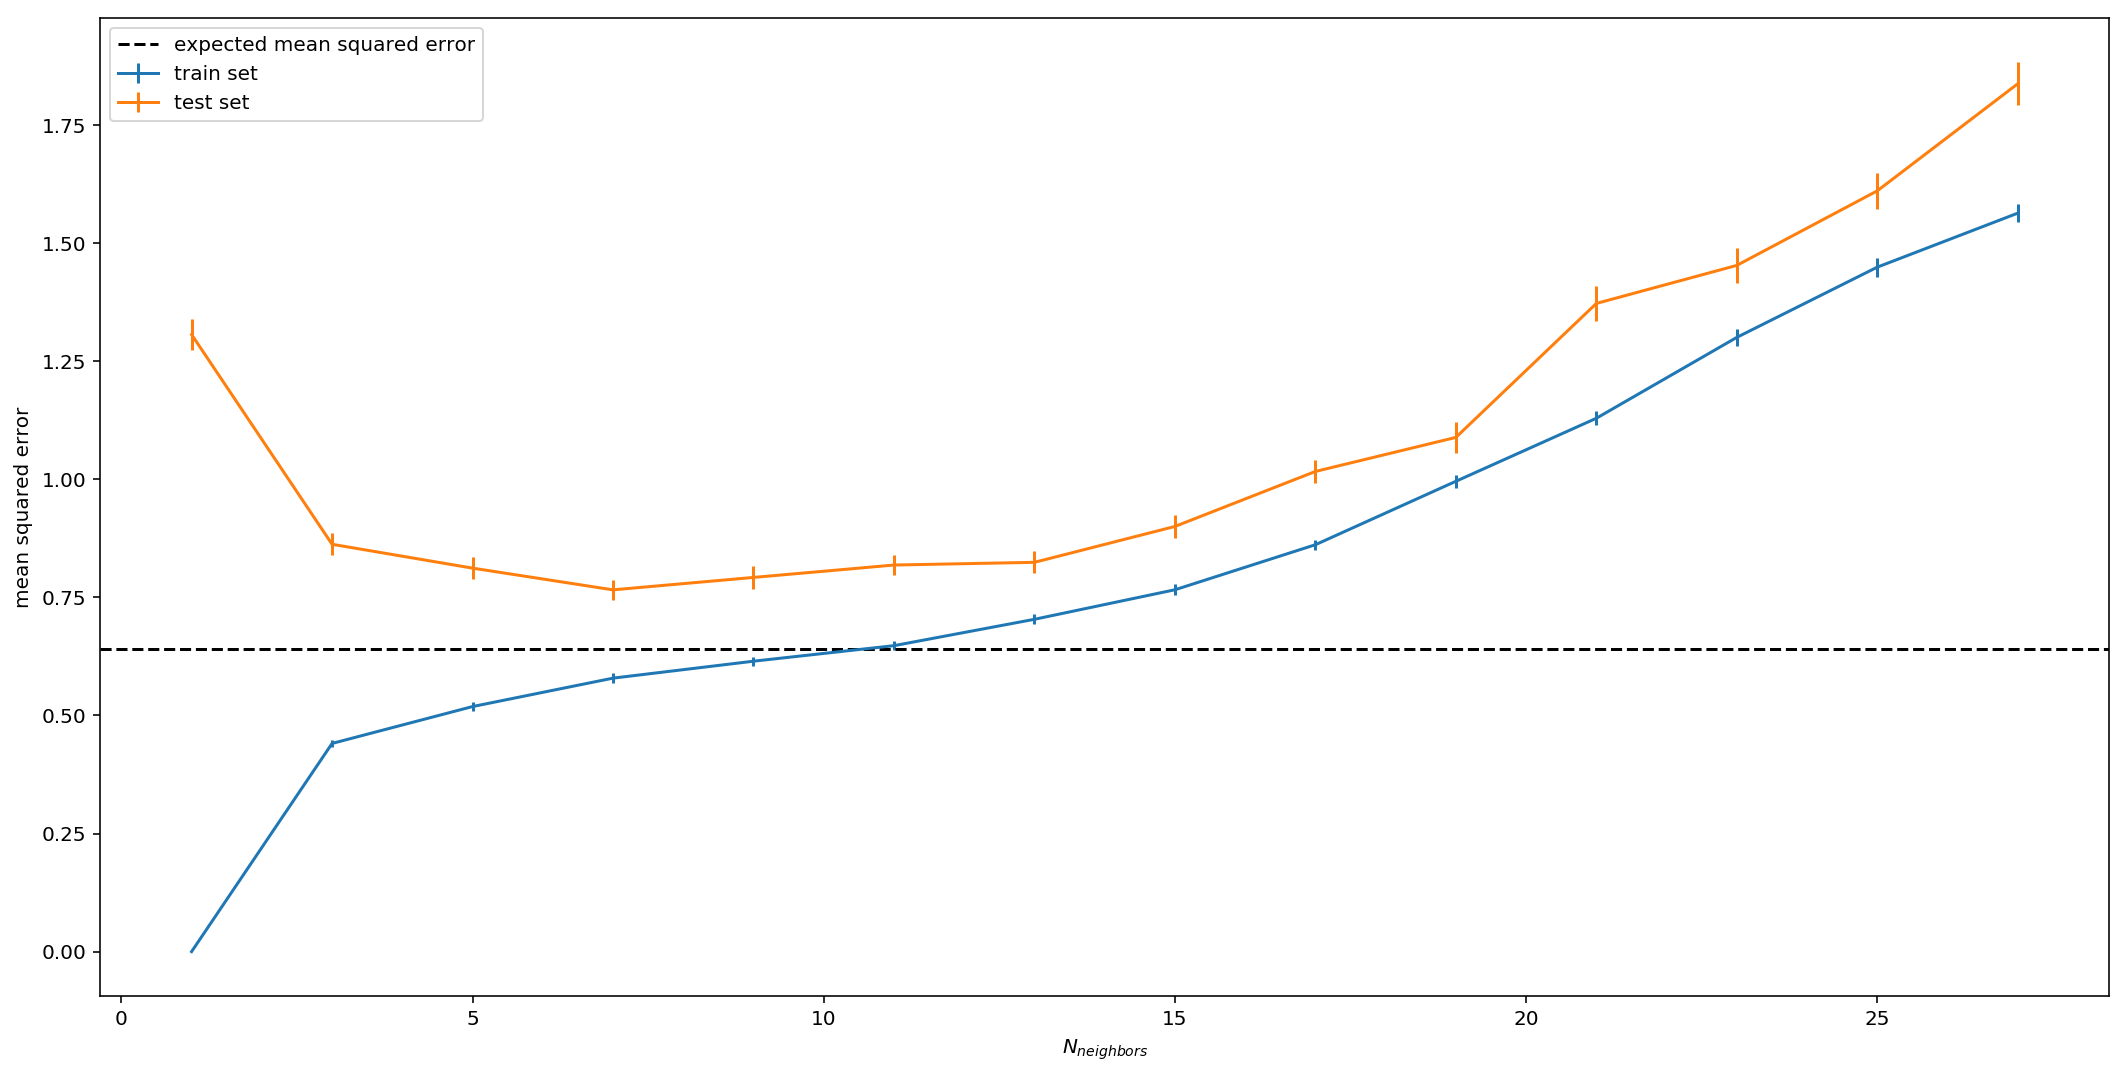

In [142]:
val = np.mean(error, axis=-1)
err = np.std(error, axis=-1) / np.sqrt(n_trials)
    
plt.figure(figsize=(18, 9))
plt.errorbar(n_neighbors, val[0], yerr=err[0], label='train set')
plt.axhline(0.8**2, linestyle='--', color='k', label='expected mean squared error')
plt.errorbar(n_neighbors, val[1], yerr=err[1], label='test set')
plt.ylabel('mean squared error')
plt.xlabel('$N_{neighbors}$')
plt.legend()

### * comment on the similarities and differences between the performance on the testing and training dataset.

As expected the training set has a better score than the testing set. 

### * find the best setting of `n_neighbors` for this dataset.

### * why is this the best setting?

### * can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Since the function defined is of the form of:

$$y=f(x) + \epsilon$$, 
where $\epsilon$ is a random variable with $Var(\epsilon) = 0.8^2$.

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

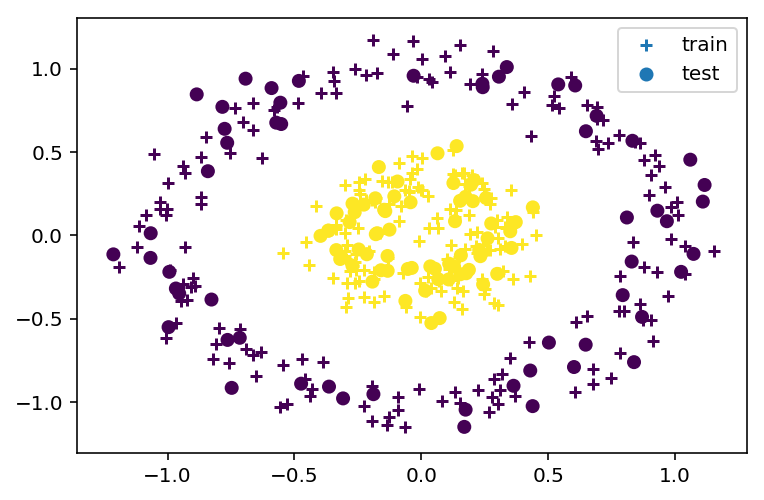

In [277]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='+', label='train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='o', label='test')
plt.legend()

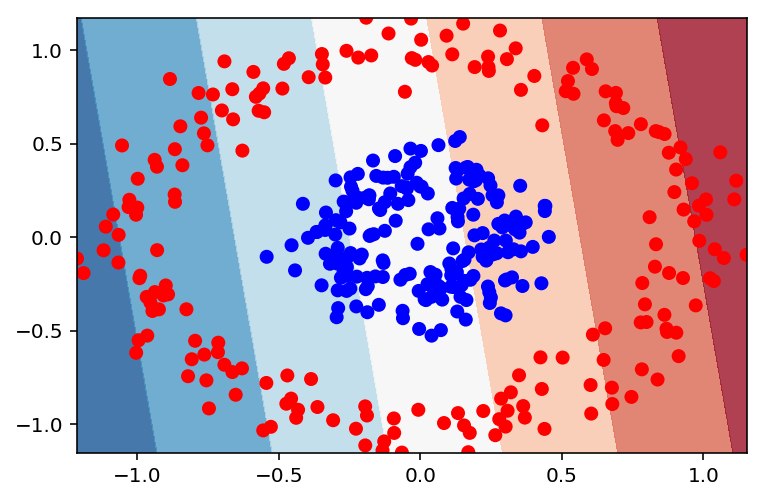

In [278]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

plot_surface(clf, X, y)